Step 1: Import required libraries

In [ ]:
import pandas as pd
import re
from google.colab import files
import csv

Step 2: Upload your Excel or CSV file

In [ ]:
uploaded = files.upload()

Saving Amazon-Product-Reviews-Sentiment-Analysis-in-Python-Dataset.csv to Amazon-Product-Reviews-Sentiment-Analysis-in-Python-Dataset (1).csv


Step 3: Load the uploaded file

In [ ]:
file_name = list(uploaded.keys())[0]













Read CSV or Excel based on file extension

In [ ]:
if file_name.endswith('.csv'):
    df = pd.read_csv(file_name, quoting=csv.QUOTE_ALL, engine='python', encoding='utf-8')
elif file_name.endswith('.xlsx'):
    df = pd.read_excel(file_name)
else:
    raise ValueError("Unsupported file type. Please upload a .csv or .xlsx file.")

Show column names to confirm

In [ ]:
print("Available columns:\n", df.columns)

Available columns:
 Index(['content', 'Sentiment'], dtype='object')


Step 4: Clean up newlines in the text column (remove line breaks)

In [ ]:
df['content'] = df['content'].astype(str).str.replace(r'[\r\n]+', ' ', regex=True)

Step 5: Function to keep only Bangla words

In [ ]:
def normalize_numerals(text):
    english_to_bangla_digits = str.maketrans("0123456789", "০১২৩৪৫৬৭৮৯")
    return text.translate(english_to_bangla_digits)

def extract_only_bangla(text):
    if isinstance(text, str):
        return re.sub(r"[^\u0980-\u09FF\s]", "", text)
    return ""

Step 6: Apply the function to the target column

In [ ]:
df['content'] = df['content'].apply(normalize_numerals)
df['cleaned_text'] = df['content'].apply(extract_only_bangla)

Step 7: Remove rows where cleaned text is empty or just spaces

In [ ]:
df['cleaned_text'] = df['cleaned_text'].str.strip()  # Remove leading/trailing whitespace
df = df[df['cleaned_text'].astype(bool)]  # Keep only rows with non-empty text

Preview cleaned data

In [ ]:
print("Preview of cleaned data:")
print(df[['cleaned_text']].head())

Preview of cleaned data:
                                         cleaned_text
3   ৫৬ দিন ব্যবহার করে রিভিউ দিচ্ছি বেল্টের কোয়াল...
6   টি সুন্দর এবং ভালো ও মোটামুটি  কিন্তু স্টিলের ...
7   টা আমার  এর জন্য নিয়েছিলাম প্রথমে অর্ডার করে ভ...
10  খুব ভালো কালারটা অরজিনাল ধন্যবাদ দারাজ ভাইকে ধ...
15  ওর্ডার করার আগেই মনে হচ্ছিলো প্রোডাক্ট টি সুন্...


Step 8: Save  the cleaned file

In [ ]:
df_to_save = df[['cleaned_text']].rename(columns={'cleaned_text': 'content'})
output_file = 'cleaned.xlsx'
df[['cleaned_text']].to_excel(output_file, index=False)

 Step 9: Download the cleaned file

In [ ]:
files.download(output_file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

------------------------------------------------BREAK here-----------------------------------------------

Label **Encode** sentiment labels as integers

In [ ]:
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

Saving 1.xlsx to 1.xlsx


In [ ]:
if file_name.endswith('.xlsx') or file_name.endswith('.xls'):
    df = pd.read_excel(file_name)
elif file_name.endswith('.csv'):
    df = pd.read_csv(file_name)

label_map = {'positive': 0,'Positive': 0, 'negative': 1, 'Negative': 1,'neutral': 2,'Neutral': 2}
df['encoded_label'] = df['Label'].str.lower().map(label_map)
print(df[['content', 'Label', 'encoded_label']].head())


                                             content     Label  encoded_label
0          আমি অডার করছি একটা আর আপনারা দিলেন আরেকটা  negative              1
1                         ভালো কিন্তু আমি এটা চাই না   neutral              2
2  উপরের গুলো কিছুটা ভালো দিলেও মাঝখানের গুলো খুব...  negative              1
3  ভাই মালটা ভুল করে ওডার হয়েছে আমি আসলে অন্য কিছ...   neutral              2
4  খুবি খারাপ জিনিস আমার দরকার ছিলো না মিস্টি বক্...  negative              1


download encoded data

In [ ]:
encoded_df = df[['content', 'Label', 'encoded_label']]
encoded_df.to_excel('encoded_labels.xlsx', index=False)
files.download('encoded_labels.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

----------------------TF-IDF Vectorization--------------


 Step 1: Import required library

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

Step 2: Initialize TF-IDF Vectorizer

In [ ]:
tfidf = TfidfVectorizer(max_features=8000)
print(df['content'].to_string(index=False))


         আমি অডার করছি একটা আর আপনারা দিলেন আরেকটা
                        ভালো কিন্তু আমি এটা চাই না
উপরের গুলো কিছুটা ভালো দিলেও মাঝখানের গুলো খুব ...
ভাই মালটা ভুল করে ওডার হয়েছে আমি আসলে অন্য কিছু...
খুবি খারাপ জিনিস আমার দরকার ছিলো না মিস্টি বক্স...
ভোয়া পন্য দিয়ে মানুষের টাকা হাতিয়ে নিচ্ছে এমন দ...
কত বড় প্রতারক হলে এমন কাজ করতে পারে আমার সঠিক জ...
আপনাদের মাথা দিছেন আমার কাজ থেকে  টাকা নিছেন শু...
    ২৫ পিছ অর্ডার করেছিলাম ডেলিভারি দিয়েছে ২৩ পিছ
       যেট অর্ডার করছি সেটা আসে নাই অন্য একটা দিছে
আমি একজন সেলার  এজন্য আমার সবসময়ই এই বক্সটি প্...
              আমার লাইফ টা লস কার্টুন  দরাইয়া দিছে
          কাটুন ভালো একসাথে অডার দিছি ৫০০ দিছে ১৫০
                         প্রতারণা ছাড়া আর কিছুই না
                       এটি খুবই ছোট এবং নিম্নমানের
                                               চলে
প্যাকেট টি আমি টাকা দিয়ে কিনেছিলাম আপনি কেন স্ট...
ফাজিল সেলার সরাসরি বক্সগুলো রশি দিয়ে বেঁধে পাঠ...
ভাই ফাজলামোর একটা সীমা থাকে আপনাদেরকে দিলাম মিষ...
ডেলিভারি না দিয়ে ডেলিভারি কমপ্

Step 3: Fit and transform the cleaned text column

In [ ]:
X = tfidf.fit_transform(df['content'])

Step 4: Extract encoded labels

In [ ]:
y = df['encoded_label']

Stp5: print

In [ ]:
tfidf_df = pd.DataFrame(X.toarray(), columns=tfidf.get_feature_names_out())
from IPython.display import display
display(tfidf_df.head())
tfidf_df.to_excel('tfidf_output.xlsx', index=False)
from google.colab import files
files.download('tfidf_output.xlsx')


,অগ,অট,অড,অত,অতট,অথ,অথচ,অধ,অন,অনল,...,৫১০,৫৬,৫৭,৬০,৬১,৬৩,৬৫,৭দ,৮ইঞ,৷লম
0,0.0,0.0,0.48723,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.164887,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.103542,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 Naive Bayes

Accuracy: 0.7323943661971831


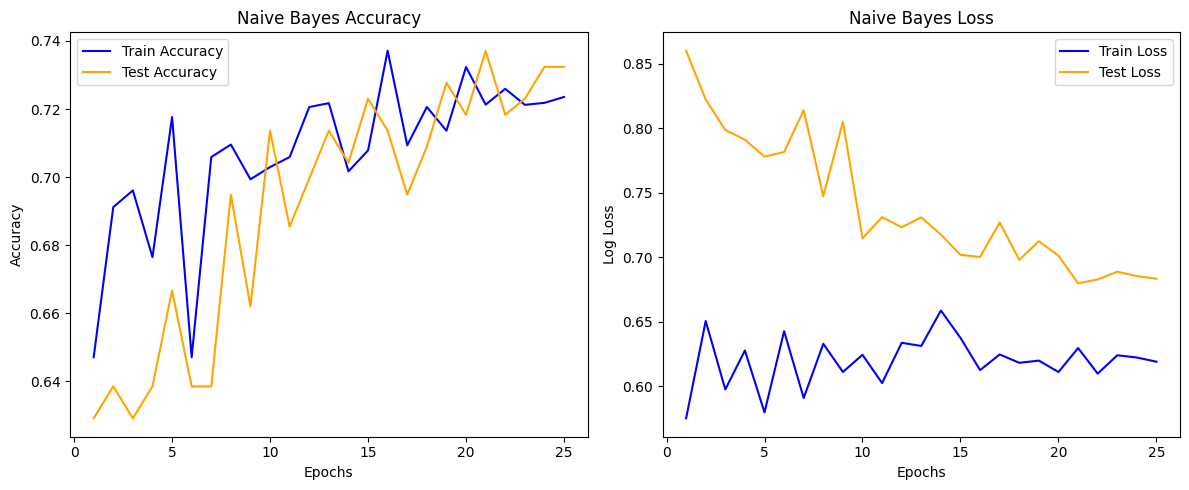

Final Test Accuracy: 0.7323943661971831

=== CLASSIFICATION REPORT ===
              precision    recall  f1-score   support

           0       0.72      0.98      0.83       134
           1       0.83      0.52      0.64        46
           2       1.00      0.03      0.06        33

    accuracy                           0.73       213
   macro avg       0.85      0.51      0.51       213
weighted avg       0.78      0.73      0.67       213



In [ ]:
# ===============================
# YOUR ORIGINAL CODE (UNCHANGED)
# ===============================

# Step 1: Import the required libraries
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Handle potential NaN values in encoded_label
df.dropna(subset=['encoded_label'], inplace=True)

# Re-generate TF-IDF features after dropping rows with NaN labels
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=8000)
X = tfidf.fit_transform(df['content'])
y = df['encoded_label']

# Step 2: Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize and train the Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = nb_model.predict(X_test)

# Step 5: Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))


import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss


# Step 1: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 2: Initialize storage for metrics
epochs = 25
train_accuracies, test_accuracies = [], []
train_losses, test_losses = [], []

for epoch in range(1, epochs + 1):
    # Gradually increase training size
    sample_size = int(X_train.shape[0] * (epoch / epochs))
    idx = np.random.choice(X_train.shape[0], sample_size, replace=False)
    X_epoch_train = X_train[idx]
    y_epoch_train = y_train.iloc[idx]  # Prevent index mismatch

    # Train model
    nb_model = MultinomialNB()
    nb_model.fit(X_epoch_train, y_epoch_train)

    # Predictions and probabilities
    train_pred = nb_model.predict(X_epoch_train)
    test_pred = nb_model.predict(X_test)
    train_proba = nb_model.predict_proba(X_epoch_train)
    test_proba = nb_model.predict_proba(X_test)

    # Metrics
    train_acc = accuracy_score(y_epoch_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)
    train_loss = log_loss(y_epoch_train, train_proba, labels=nb_model.classes_)
    test_loss = log_loss(y_test, test_proba, labels=nb_model.classes_)

    # Append results
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    train_losses.append(train_loss)
    test_losses.append(test_loss)

# Step 3: Plot Accuracy and Loss
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), train_accuracies, label="Train Accuracy", color="blue")
plt.plot(range(1, epochs + 1), test_accuracies, label="Test Accuracy", color="orange")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Naive Bayes Accuracy")
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), train_losses, label="Train Loss", color="blue")
plt.plot(range(1, epochs + 1), test_losses, label="Test Loss", color="orange")
plt.xlabel("Epochs")
plt.ylabel("Log Loss")
plt.title("Naive Bayes Loss")
plt.legend()

plt.tight_layout()
plt.show()

# Final accuracy on test set
final_test_pred = nb_model.predict(X_test)
print("Final Test Accuracy:", accuracy_score(y_test, final_test_pred))




from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import seaborn as sns

# ----------------------------------------
# 1. Classification Report
# ----------------------------------------
print("\n=== CLASSIFICATION REPORT ===")
print(classification_report(y_test, final_test_pred))





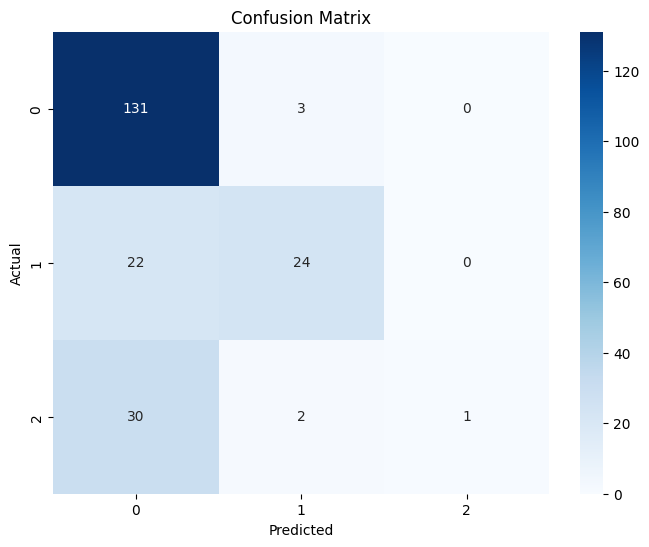

In [ ]:
# ----------------------------------------
# 2. Confusion Matrix + Heatmap
# ----------------------------------------
cm = confusion_matrix(y_test, final_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

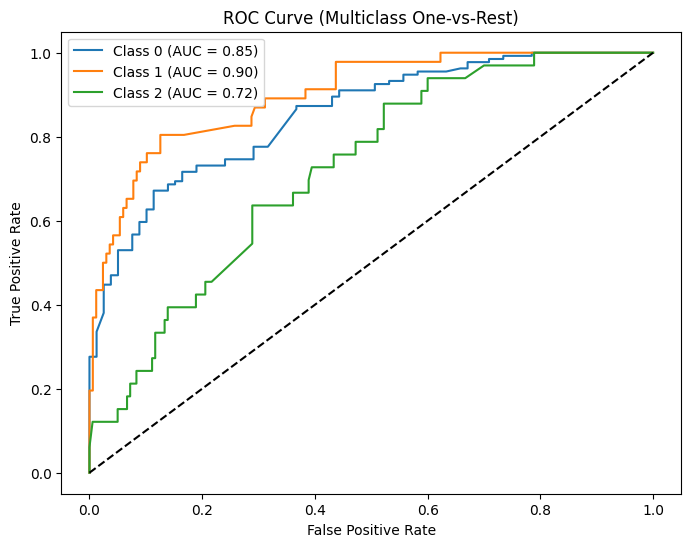

In [ ]:
# ----------------------------------------
# 3. ROC Curve (Multiclass One-vs-Rest)
# ----------------------------------------

# Binarize labels for multi-class ROC
classes = np.unique(y)
y_test_bin = label_binarize(y_test, classes=classes)
y_score = nb_model.predict_proba(X_test)

plt.figure(figsize=(8, 6))

for i, cls in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {cls} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Multiclass One-vs-Rest)")
plt.legend()
plt.show()

In [ ]:
# ----------------------------------------
# 4. Feature Importance (MultinomialNB)
# ----------------------------------------
feature_names = tfidf.get_feature_names_out()
class_labels = nb_model.classes_

for idx, cls in enumerate(class_labels):
    # Sort log probabilities
    top10 = np.argsort(nb_model.feature_log_prob_[idx])[::-1][:10]
    print(f"\nTop 10 Important Features for Class {cls}:")
    for i in top10:
        print(f"  {feature_names[i]}   (score: {nb_model.feature_log_prob_[idx][i]:.4f})")


Top 10 Important Features for Class 0:
  অন   (score: -3.3132)
  আলহ   (score: -3.9151)
  মদ   (score: -3.9229)
  দর   (score: -3.9460)
  যব   (score: -4.0224)
  ধন   (score: -4.0438)
  সব   (score: -4.3564)
  মন   (score: -4.3756)
  আপন   (score: -4.3932)
  আছ   (score: -4.3967)

Top 10 Important Features for Class 1:
  আম   (score: -4.5279)
  একট   (score: -4.6360)
  লত   (score: -4.7171)
  আর   (score: -4.7183)
  কর   (score: -4.7287)
  এট   (score: -4.7646)
  পর   (score: -4.7947)
  মন   (score: -4.8474)
  পড   (score: -4.8483)
  একদম   (score: -4.9040)

Top 10 Important Features for Class 2:
  চল   (score: -4.6123)
  আছ   (score: -4.6423)
  অন   (score: -4.6854)
  একট   (score: -4.7299)
  তব   (score: -4.8471)
  আম   (score: -4.9053)
  আর   (score: -4.9224)
  কর   (score: -4.9631)
  এট   (score: -5.1817)
  হয়   (score: -5.2261)


Logistic Regression

Accuracy: 0.7464788732394366


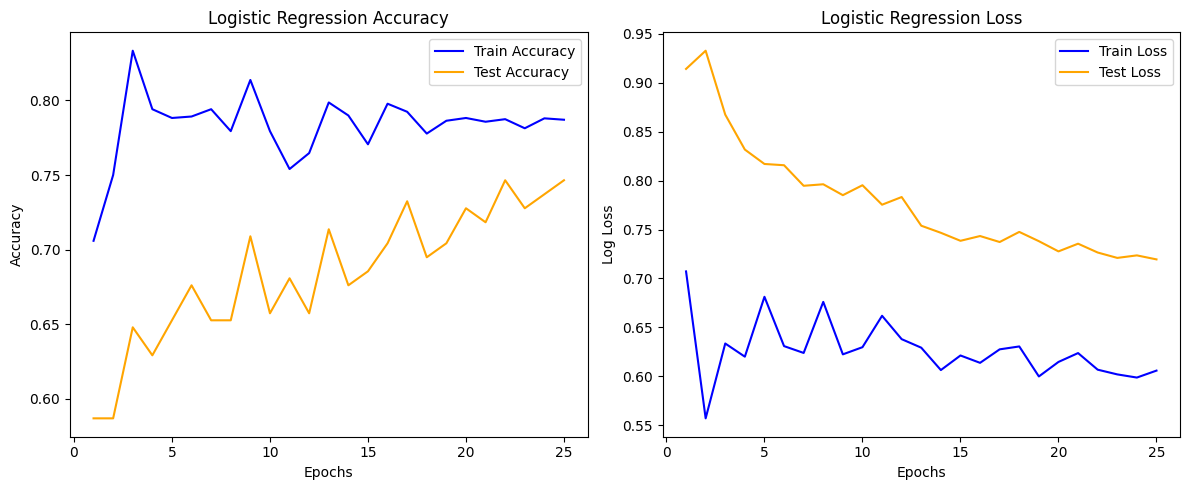

Final Test Accuracy: 0.7464788732394366


In [ ]:
# Step 1: Import the required modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Step 2: Stratified Train-Test Split for better balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=3)

# Step 3: Initialize and train the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, solver='liblinear')
lr_model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = lr_model.predict(X_test)

# Step 5: Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))



import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss

# Step 1: Stratified Train-Test Split for better balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=3
)

# Step 2: Initialize storage for metrics
epochs = 25
train_accuracies, test_accuracies = [], []
train_losses, test_losses = [], []

for epoch in range(1, epochs + 1):
    # Gradually increase training size
    sample_size = int(X_train.shape[0] * (epoch / epochs))
    idx = np.random.choice(X_train.shape[0], sample_size, replace=False)
    X_epoch_train = X_train[idx]
    y_epoch_train = y_train.iloc[idx]  # Prevent index mismatch

    # Train model
    lr_model = LogisticRegression(max_iter=1000, solver='liblinear')
    lr_model.fit(X_epoch_train, y_epoch_train)

    # Predictions and probabilities
    train_pred = lr_model.predict(X_epoch_train)
    test_pred = lr_model.predict(X_test)
    train_proba = lr_model.predict_proba(X_epoch_train)
    test_proba = lr_model.predict_proba(X_test)

    # Metrics
    train_acc = accuracy_score(y_epoch_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)
    train_loss = log_loss(y_epoch_train, train_proba, labels=lr_model.classes_)
    test_loss = log_loss(y_test, test_proba, labels=lr_model.classes_)

    # Append results
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    train_losses.append(train_loss)
    test_losses.append(test_loss)

# Step 3: Plot Accuracy and Loss
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), train_accuracies, label="Train Accuracy", color="blue")
plt.plot(range(1, epochs + 1), test_accuracies, label="Test Accuracy", color="orange")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Logistic Regression Accuracy")
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), train_losses, label="Train Loss", color="blue")
plt.plot(range(1, epochs + 1), test_losses, label="Test Loss", color="orange")
plt.xlabel("Epochs")
plt.ylabel("Log Loss")
plt.title("Logistic Regression Loss")
plt.legend()

plt.tight_layout()
plt.show()

# Final accuracy on test set
final_test_pred = lr_model.predict(X_test)
print("Final Test Accuracy:", accuracy_score(y_test, final_test_pred))




=== CLASSIFICATION REPORT ===
              precision    recall  f1-score   support

           0       0.76      0.94      0.84       125
           1       0.72      0.67      0.69        54
           2       0.60      0.18      0.27        34

    accuracy                           0.75       213
   macro avg       0.69      0.59      0.60       213
weighted avg       0.73      0.75      0.71       213



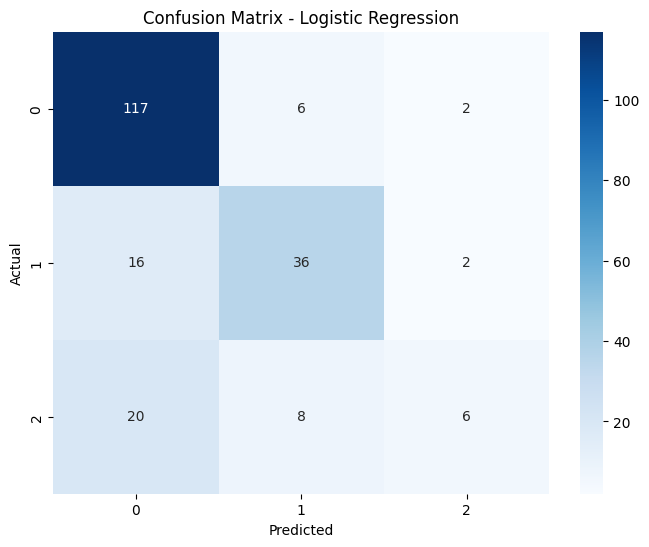

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import seaborn as sns

# ----------------------------------------
# 1. Classification Report
# ----------------------------------------
print("\n=== CLASSIFICATION REPORT ===")
print(classification_report(y_test, final_test_pred))

# ----------------------------------------
# 2. Confusion Matrix + Heatmap
# ----------------------------------------
cm = confusion_matrix(y_test, final_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()





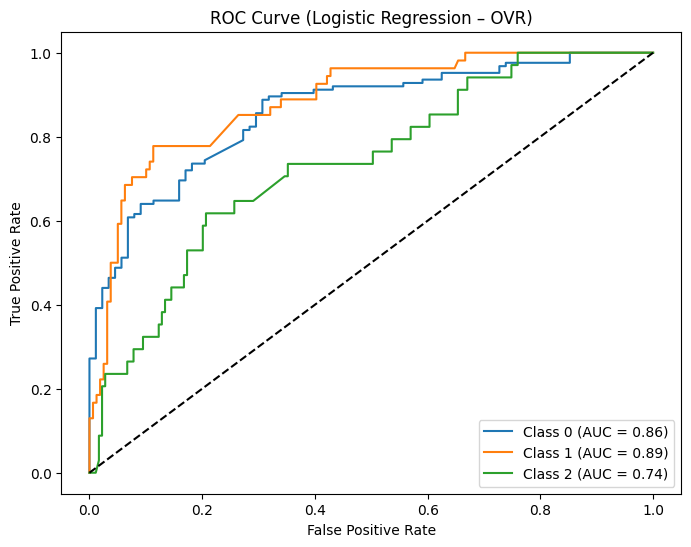

In [ ]:
# ----------------------------------------
# 3. ROC Curve (One-vs-Rest Multiclass)
# ----------------------------------------
classes = np.unique(y)
y_test_bin = label_binarize(y_test, classes=classes)
y_score = lr_model.predict_proba(X_test)

plt.figure(figsize=(8, 6))

for i, cls in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {cls} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Logistic Regression – OVR)")
plt.legend()
plt.show()

In [ ]:
# ----------------------------------------
# 4. FEATURE IMPORTANCE (Logistic Regression Coefficients)
# ----------------------------------------
feature_names = tfidf.get_feature_names_out()
class_labels = lr_model.classes_

for idx, cls in enumerate(class_labels):
    print(f"\nTop 15 Features for Class {cls}:")
    top15 = np.argsort(lr_model.coef_[idx])[::-1][:15]
    for i in top15:
        print(f"{feature_names[i]}   (coef={lr_model.coef_[idx][i]:.4f})")


Top 15 Features for Class 0:
দর   (coef=2.5011)
যব   (coef=2.3716)
ধন   (coef=2.2203)
আলহ   (coef=2.0494)
মদ   (coef=2.0494)
অন   (coef=2.0481)
আপন   (coef=1.6185)
অস   (coef=1.5390)
লই   (coef=1.5376)
সব   (coef=1.4630)
মনট   (coef=1.0891)
ইল   (coef=1.0665)
মধ   (coef=1.0544)
এই   (coef=1.0262)
বই   (coef=1.0195)

Top 15 Features for Class 1:
লত   (coef=2.0166)
একব   (coef=1.5958)
উঠ   (coef=1.5563)
পড   (coef=1.4919)
একদম   (coef=1.4200)
ছব   (coef=1.1887)
করব   (coef=1.1392)
ঠক   (coef=1.1013)
নয়   (coef=1.0738)
নব   (coef=1.0666)
এট   (coef=1.0208)
নষ   (coef=1.0192)
ইজ   (coef=1.0148)
রঙ   (coef=0.9817)
পল   (coef=0.9259)

Top 15 Features for Class 2:
তব   (coef=1.8912)
চল   (coef=1.5132)
তল   (coef=1.2288)
আর   (coef=0.9762)
আছ   (coef=0.9731)
হয়   (coef=0.9523)
মতন   (coef=0.9296)
যট   (coef=0.8989)
পল   (coef=0.8856)
১৫০   (coef=0.7768)
করছ   (coef=0.7661)
লক   (coef=0.7627)
কর   (coef=0.7579)
একট   (coef=0.7157)
কট   (coef=0.7003)


KNN

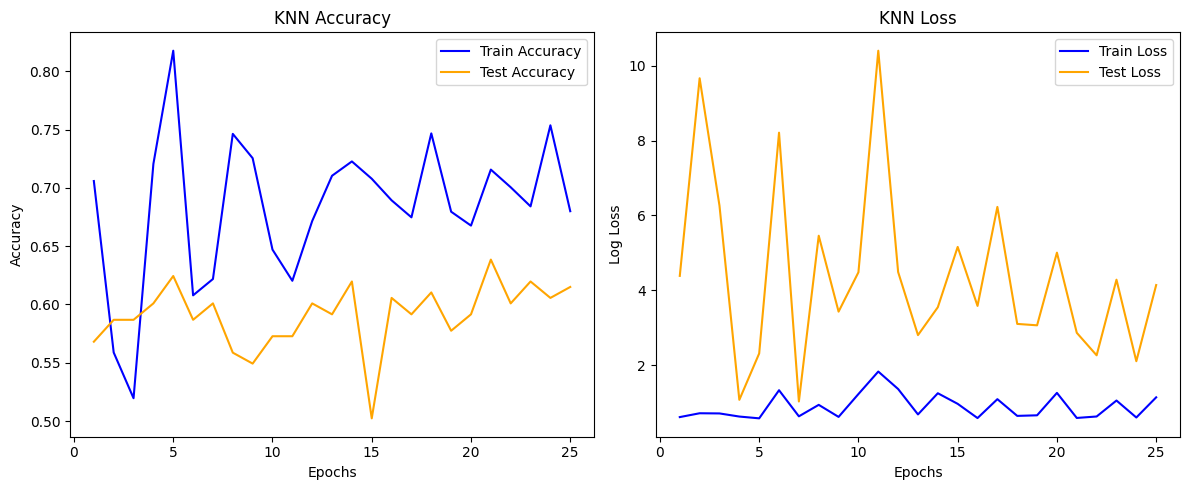

Final Test Accuracy: 0.6150234741784038


In [ ]:
# Step 1: Import required libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Step 2: Stratified train-test split to maintain label balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

# Step 3: Initialize and train KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Step 4: Predict
y_pred = knn_model.predict(X_test)

# Step 5: Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))


import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss

# Step 1: Stratified train-test split to maintain label balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Step 2: Initialize storage for metrics
epochs = 25
train_accuracies, test_accuracies = [], []
train_losses, test_losses = [], []

for epoch in range(1, epochs + 1):
    # Gradually increase training size
    sample_size = int(X_train.shape[0] * (epoch / epochs))
    idx = np.random.choice(X_train.shape[0], sample_size, replace=False)
    X_epoch_train = X_train[idx]
    y_epoch_train = y_train.iloc[idx]  # Prevent index mismatch

    # Train model
    knn_model = KNeighborsClassifier(n_neighbors=5)
    knn_model.fit(X_epoch_train, y_epoch_train)

    # Predictions and probabilities
    train_pred = knn_model.predict(X_epoch_train)
    test_pred = knn_model.predict(X_test)

    # Some KNN implementations may not have predict_proba if not classification
    if hasattr(knn_model, "predict_proba"):
        train_proba = knn_model.predict_proba(X_epoch_train)
        test_proba = knn_model.predict_proba(X_test)
    else:
        # Convert predictions to a probability-like one-hot encoding for log_loss
        train_proba = np.eye(len(knn_model.classes_))[train_pred]
        test_proba = np.eye(len(knn_model.classes_))[test_pred]

    # Metrics
    train_acc = accuracy_score(y_epoch_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)
    train_loss = log_loss(y_epoch_train, train_proba, labels=knn_model.classes_)
    test_loss = log_loss(y_test, test_proba, labels=knn_model.classes_)

    # Append results
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    train_losses.append(train_loss)
    test_losses.append(test_loss)

# Step 3: Plot Accuracy and Loss
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), train_accuracies, label="Train Accuracy", color="blue")
plt.plot(range(1, epochs + 1), test_accuracies, label="Test Accuracy", color="orange")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy")
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), train_losses, label="Train Loss", color="blue")
plt.plot(range(1, epochs + 1), test_losses, label="Test Loss", color="orange")
plt.xlabel("Epochs")
plt.ylabel("Log Loss")
plt.title("KNN Loss")
plt.legend()

plt.tight_layout()
plt.show()

# Final accuracy on test set
final_test_pred = knn_model.predict(X_test)
print("Final Test Accuracy:", accuracy_score(y_test, final_test_pred))





=== CLASSIFICATION REPORT ===
              precision    recall  f1-score   support

           0       0.76      0.94      0.84       125
           1       0.72      0.67      0.69        54
           2       0.60      0.18      0.27        34

    accuracy                           0.75       213
   macro avg       0.69      0.59      0.60       213
weighted avg       0.73      0.75      0.71       213



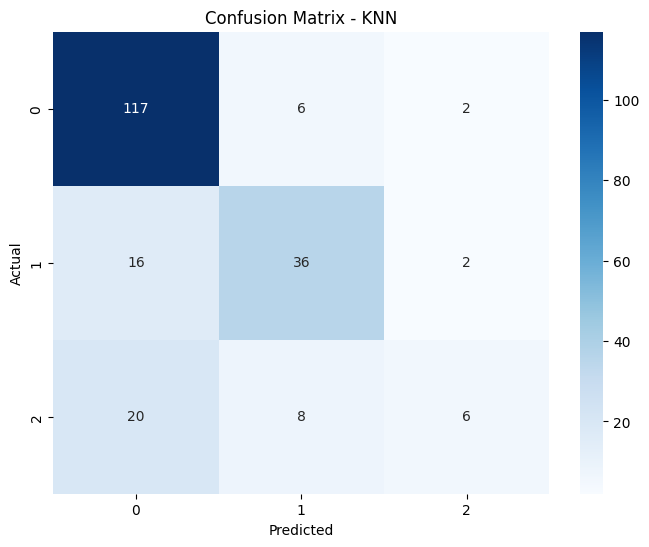

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import seaborn as sns

# ----------------------------------------
# 1. Classification Report
# ----------------------------------------
print("\n=== CLASSIFICATION REPORT ===")
print(classification_report(y_test, final_test_pred))

# ----------------------------------------
# 2. Confusion Matrix + Heatmap
# ----------------------------------------
cm = confusion_matrix(y_test, final_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



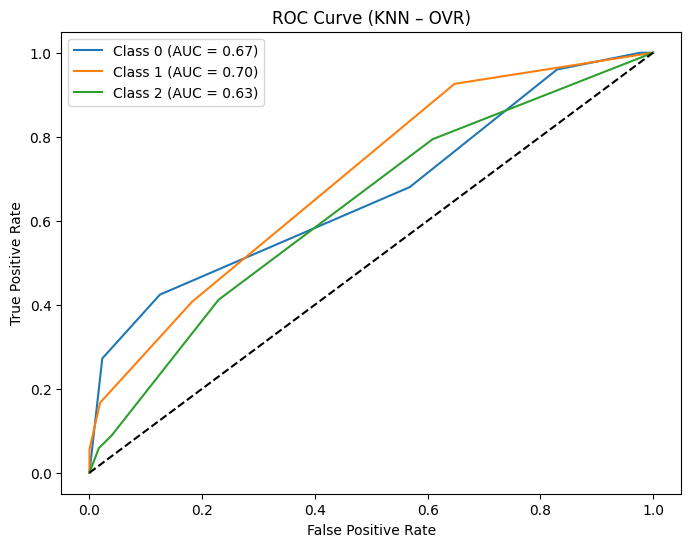

In [ ]:
# ----------------------------------------
# 3. ROC Curve (One-vs-Rest Multiclass)
# ----------------------------------------
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Ensure X and y are defined from previous steps (TF-IDF and label encoding)
# Re-split data to ensure X_test and y_test are consistent
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

# Re-initialize and train KNN model if it's not defined
if 'knn_model' not in locals() or knn_model is None:
    knn_model = KNeighborsClassifier(n_neighbors=5)
    knn_model.fit(X_train, y_train)

classes = np.unique(y)
y_test_bin = label_binarize(y_test, classes=classes)

# If KNN has no predict_proba, use one-hot encoded probabilities from distances
try:
    y_score = knn_model.predict_proba(X_test)
except:
    # For models without predict_proba, use a placeholder or handle as necessary
    # This part was causing a NameError because knn_model was undefined
    # Re-predict using the newly trained knn_model
    final_test_pred = knn_model.predict(X_test)
    y_score = np.eye(len(knn_model.classes_))[final_test_pred]

plt.figure(figsize=(8, 6))

for i, cls in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {cls} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (KNN – OVR)")
plt.legend()
plt.show()

In [ ]:
# ----------------------------------------
# 4. FEATURE IMPORTANCE (KNN workaround)
#    KNN has no coefficients → we use distance-based influence
# ----------------------------------------

## *********************note that Distance-Weighted Feature Influence using mean distances ***************

feature_names = tfidf.get_feature_names_out()

# Compute avg distance to neighbors per feature influence (approximation)
dists, neigh_idx = knn_model.kneighbors(X_train[:200])  # sample to reduce computation
feature_influence = np.array(X_train[:200].mean(axis=0)).ravel()

top_idx = feature_influence.argsort()[::-1][:15]

print("\n=== Approximate Top 15 Influential Features (KNN) ===")
for i in top_idx:
    print(f"{feature_names[i]}   (influence={feature_influence[i]:.4f})")


=== Approximate Top 15 Influential Features (KNN) ===
অন   (influence=0.1012)
দর   (influence=0.0561)
একট   (influence=0.0458)
সব   (influence=0.0429)
আছ   (influence=0.0412)
যব   (influence=0.0391)
ধন   (influence=0.0378)
আম   (influence=0.0376)
আপন   (influence=0.0332)
মদ   (influence=0.0315)
কর   (influence=0.0307)
আলহ   (influence=0.0307)
ইল   (influence=0.0294)
হয   (influence=0.0277)
পড   (influence=0.0275)


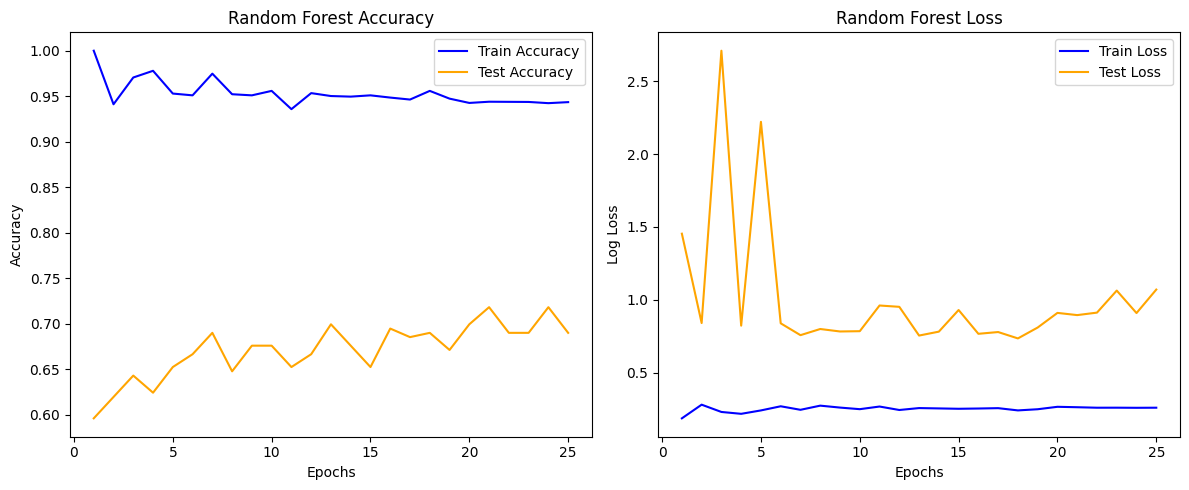

Final Test Accuracy: 0.6901408450704225


In [ ]:
# -------------------- RANDOM FOREST with TF-IDF --------------------
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict & Evaluate
rf_preds = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))


import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss

# Step 1: Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Step 2: Initialize storage for metrics
epochs = 25
train_accuracies, test_accuracies = [], []
train_losses, test_losses = [], []

for epoch in range(1, epochs + 1):
    # Gradually increase training size
    sample_size = int(X_train.shape[0] * (epoch / epochs))
    idx = np.random.choice(X_train.shape[0], sample_size, replace=False)
    X_epoch_train = X_train[idx]
    y_epoch_train = y_train.iloc[idx]  # Prevent index mismatch

    # Train model
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_epoch_train, y_epoch_train)

    # Predictions and probabilities
    train_pred = rf_model.predict(X_epoch_train)
    test_pred = rf_model.predict(X_test)
    train_proba = rf_model.predict_proba(X_epoch_train)
    test_proba = rf_model.predict_proba(X_test)

    # Metrics
    train_acc = accuracy_score(y_epoch_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)
    train_loss = log_loss(y_epoch_train, train_proba, labels=rf_model.classes_)
    test_loss = log_loss(y_test, test_proba, labels=rf_model.classes_)

    # Append results
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    train_losses.append(train_loss)
    test_losses.append(test_loss)

# Step 3: Plot Accuracy and Loss
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), train_accuracies, label="Train Accuracy", color="blue")
plt.plot(range(1, epochs + 1), test_accuracies, label="Test Accuracy", color="orange")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Random Forest Accuracy")
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), train_losses, label="Train Loss", color="blue")
plt.plot(range(1, epochs + 1), test_losses, label="Test Loss", color="orange")
plt.xlabel("Epochs")
plt.ylabel("Log Loss")
plt.title("Random Forest Loss")
plt.legend()

plt.tight_layout()
plt.show()

# Final accuracy on test set
final_test_pred = rf_model.predict(X_test)
print("Final Test Accuracy:", accuracy_score(y_test, final_test_pred))



Classification Report:

              precision    recall  f1-score   support

           0       0.54      0.66      0.60       125
           1       0.24      0.22      0.23        54
           2       0.10      0.03      0.05        34

    accuracy                           0.45       213
   macro avg       0.29      0.31      0.29       213
weighted avg       0.40      0.45      0.42       213



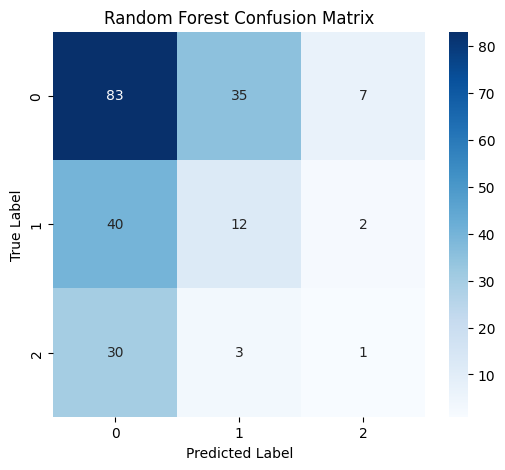

In [ ]:
# -------------------- CLASSIFICATION REPORT --------------------
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import seaborn as sns

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, final_test_pred))

# -------------------- CONFUSION MATRIX --------------------
cm = confusion_matrix(y_test, final_test_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()




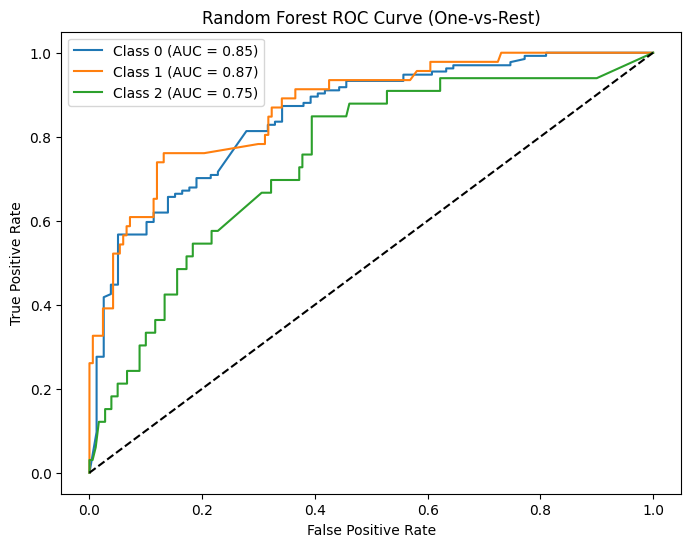

In [ ]:
# -------------------- ROC CURVE (MULTICLASS OVR) --------------------
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np # Added import for np.unique

# Ensure X and y are defined from previous steps (TF-IDF and label encoding)
# Re-train Random Forest model if not already defined (ensuring X, y are in scope)
if 'rf_model' not in locals() or rf_model is None:
    # Assuming X and y are available from previous executed cells (TF-IDF and label encoding)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

# Binarize labels
classes = np.unique(y)
y_test_bin = label_binarize(y_test, classes=classes)
test_proba = rf_model.predict_proba(X_test)

plt.figure(figsize=(8, 6))

for i in range(len(classes)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], test_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {classes[i]} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--")
plt.title("Random Forest ROC Curve (One-vs-Rest)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

/tmp/ipython-input-2648216399.py:10: UserWarning: Glyph 2447 (\N{BENGALI LETTER E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2648216399.py:10: UserWarning: Matplotlib currently does not support Bengali natively.
  plt.tight_layout()
/tmp/ipython-input-2648216399.py:10: UserWarning: Glyph 2453 (\N{BENGALI LETTER KA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2648216399.py:10: UserWarning: Glyph 2439 (\N{BENGALI LETTER I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2648216399.py:10: UserWarning: Glyph 2482 (\N{BENGALI LETTER LA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2648216399.py:10: UserWarning: Glyph 2474 (\N{BENGALI LETTER PA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2648216399.py:10: UserWarning: Glyph 2465 (\N{BENGALI LETTER DDA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2648216399.py:1

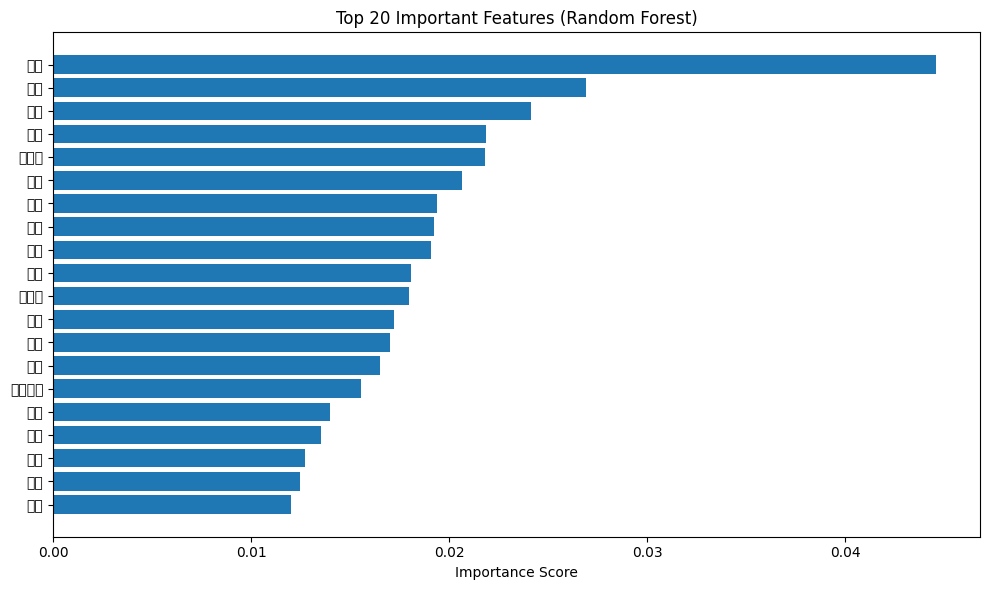

In [ ]:
# -------------------- FEATURE IMPORTANCE --------------------
importances = rf_model.feature_importances_
indices = np.argsort(importances)[-20:]  # Top 20 features

plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), np.array(feature_names)[indices])  # Use your TF-IDF feature names
plt.title("Top 20 Important Features (Random Forest)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

Tokenization and Padding

Required Libraries

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


Code: Tokenization + Padding

Step 1: Set max number of words in vocabulary

In [ ]:
vocab_size = 5000  # Limit total number of words (changeable)
oov_token = "<OOV>"  # Token for out-of-vocabulary words

Step 2: Initialize the tokenizer

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)

Step 3: Fit tokenizer on cleaned Bangla text

In [ ]:
tokenizer.fit_on_texts(df['content'])

Step 4: Convert text to sequences of word indexes

In [ ]:
sequences = tokenizer.texts_to_sequences(df['content'])

Step 5: Set maximum sequence length

In [ ]:
max_length = max(len(seq) for seq in sequences)

Step 6: Apply padding

In [ ]:
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')

Print

In [ ]:
for i in range(5):
    print(f"\nOriginal Text   : {df['content'].iloc[i]}")
    print(f"Tokenized       : {sequences[i]}")
    print(f"Padded Sequence : {padded_sequences[i]}")


Original Text   : আমি অডার করছি একটা আর আপনারা দিলেন আরেকটা
Tokenized       : [18, 356, 163, 13, 20, 37, 307, 194]
Padded Sequence : [ 18 356 163  13  20  37 307 194   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0]

Original Text   : ভালো কিন্তু আমি এটা চাই না
Tokenized       : [2, 15, 18, 21, 195, 4]
Padded Sequence : [  2  15  18  21 195   4   0   0   0   0   0   0   0   0   0   0 

Download Tokenization + Padding

In [ ]:
# Create a new DataFrame for export
df_export = pd.DataFrame({
    'original_text': df['content'],
    'tokenized': sequences,
    'padded': padded_sequences.tolist()
})

# Optional: convert padded lists to space-separated strings
df_export['padded'] = df_export['padded'].apply(lambda x: ' '.join(map(str, x)))

# Save to Excel
df_export.to_excel('Tokenization.xlsx', index=False)

# Download if using Google Colab
from google.colab import files
files.download('Tokenization.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Epoch 1/25


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.4951 - loss: 1.0417 - val_accuracy: 0.6291 - val_loss: 0.8837
Epoch 2/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.5649 - loss: 0.9125 - val_accuracy: 0.6854 - val_loss: 0.7342
Epoch 3/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.7297 - loss: 0.6607 - val_accuracy: 0.7418 - val_loss: 0.5812
Epoch 4/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.8538 - loss: 0.3885 - val_accuracy: 0.7606 - val_loss: 0.5358
Epoch 5/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9422 - loss: 0.2302 - val_accuracy: 0.7746 - val_loss: 0.5211
Epoch 6/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9823 - loss: 0.1115 - val_accuracy: 0.7512 - val_loss: 0.5333
Epoch 7/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9906 - loss: 0.0740 - val_accuracy: 0.7887 - val_loss: 0.5768
Epoch 8/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9841 - loss: 0.0533 - val_accuracy: 0.7887 - val_loss: 0.

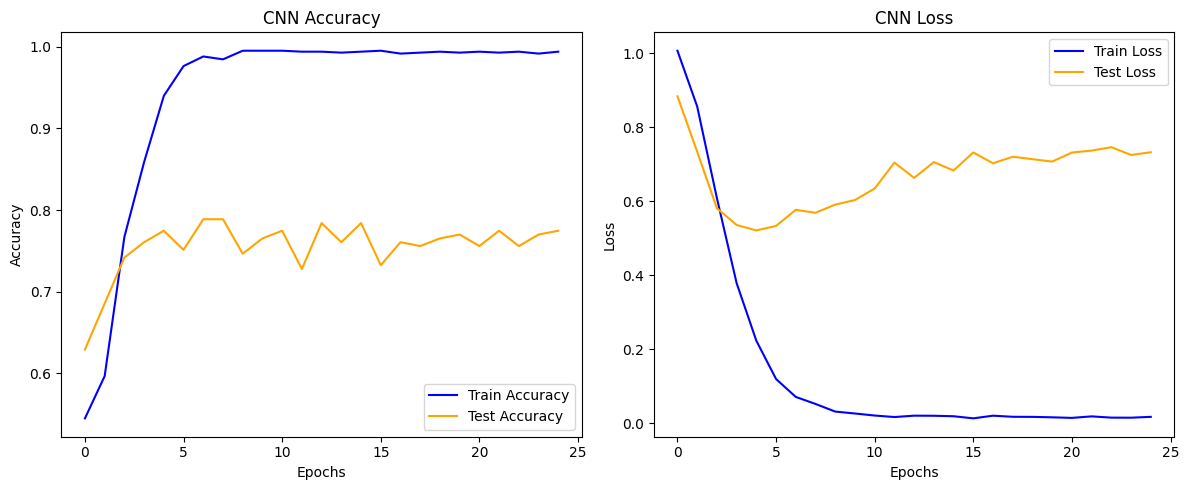

Final CNN Test Accuracy: 0.7746478915214539


In [ ]:
# # -------------------- CNN with Tokenization + Padding --------------------
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense

# # Split padded sequences
# X_train_seq, X_test_seq, y_train_seq, y_test_seq = train_test_split(
#     padded_sequences, y, test_size=0.2, random_state=42
# )

# # CNN Model
# embedding_dim = 64
# cnn_model = Sequential([
#     Embedding(vocab_size, embedding_dim, input_length=max_length),
#     Conv1D(128, 5, activation='relu'),
#     GlobalMaxPooling1D(),
#     Dense(64, activation='relu'),
#     Dense(3, activation='softmax')  # 3 classes
# ])

# cnn_model.compile(loss='sparse_categorical_crossentropy',
#                   optimizer='adam',
#                   metrics=['accuracy'])

# # Train CNN
# cnn_model.fit(X_train_seq, y_train_seq, epochs=5, batch_size=32, validation_data=(X_test_seq, y_test_seq), verbose=1)

# # Evaluate CNN
# loss, acc = cnn_model.evaluate(X_test_seq, y_test_seq, verbose=0)
# print("CNN Accuracy:", acc)



import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Step 1: Train-test split
X_train_seq, X_test_seq, y_train_seq, y_test_seq = train_test_split(
    padded_sequences, y, test_size=0.2, random_state=42
)

# Step 2: CNN Model
embedding_dim = 64
cnn_model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes
])

cnn_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Step 3: Train with validation to get test metrics per epoch
history = cnn_model.fit(
    X_train_seq, y_train_seq,
    epochs=25,  # Same as other models
    batch_size=32,
    validation_data=(X_test_seq, y_test_seq),
    verbose=1
)

# Step 4: Plot Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Test Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('CNN Accuracy')
plt.legend()

# Step 5: Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Test Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('CNN Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Step 6: Final evaluation
loss, acc = cnn_model.evaluate(X_test_seq, y_test_seq, verbose=0)
print("Final CNN Test Accuracy:", acc)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step

Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.89      0.88       134
           1       0.70      0.72      0.71        46
           2       0.42      0.39      0.41        33

    accuracy                           0.77       213
   macro avg       0.67      0.67      0.67       213
weighted avg       0.77      0.77      0.77       213



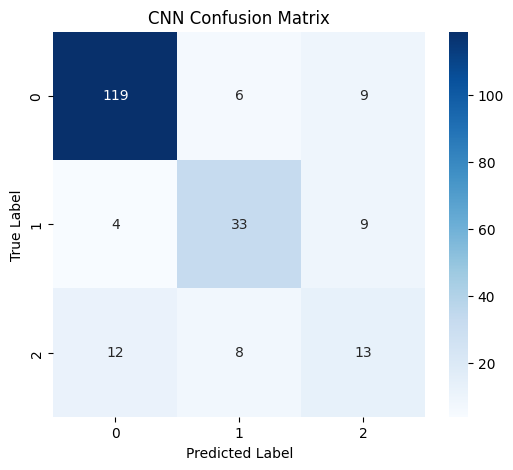

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import label_binarize
import seaborn as sns
import numpy as np

# -------------------- CLASSIFICATION REPORT --------------------
y_pred_prob = cnn_model.predict(X_test_seq)
y_pred = np.argmax(y_pred_prob, axis=1)

print("\nClassification Report:\n")
print(classification_report(y_test_seq, y_pred))

# -------------------- CONFUSION MATRIX --------------------
cm = confusion_matrix(y_test_seq, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("CNN Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()




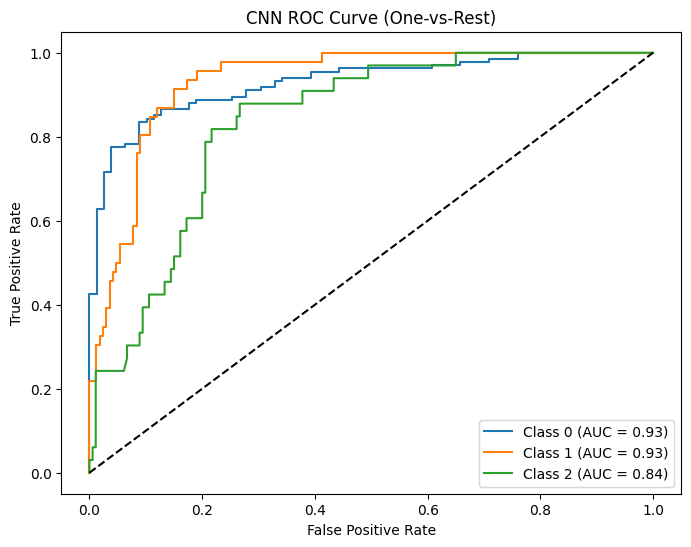

In [ ]:
# -------------------- ROC CURVE (One-vs-Rest Multiclass) --------------------
classes = np.unique(y)
y_test_bin = label_binarize(y_test_seq, classes=classes)

plt.figure(figsize=(8, 6))
for i in range(len(classes)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {classes[i]} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.title("CNN ROC Curve (One-vs-Rest)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()



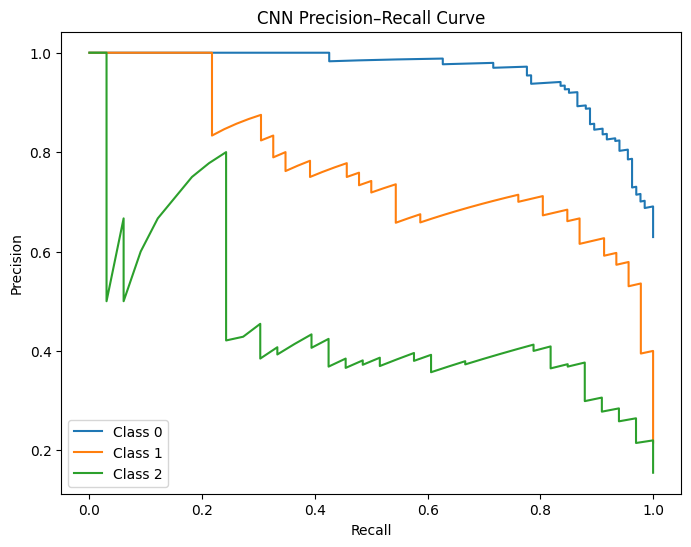

In [ ]:
# -------------------- PRECISION-RECALL CURVE --------------------
plt.figure(figsize=(8, 6))
for i in range(len(classes)):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_pred_prob[:, i])
    plt.plot(recall, precision, label=f"Class {classes[i]}")

plt.title("CNN Precision–Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()



#######LSTM

Epoch 1/25


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


27/27 ━━━━━━━━━━━━━━━━━━━━ 27s 508ms/step - accuracy: 0.5137 - loss: 1.0252 - val_accuracy: 0.6291 - val_loss: 0.8882
Epoch 2/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 11s 416ms/step - accuracy: 0.5995 - loss: 0.8799 - val_accuracy: 0.7465 - val_loss: 0.6655
Epoch 3/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 11s 420ms/step - accuracy: 0.7340 - loss: 0.6524 - val_accuracy: 0.7371 - val_loss: 0.6294
Epoch 4/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 11s 414ms/step - accuracy: 0.7946 - loss: 0.4941 - val_accuracy: 0.7371 - val_loss: 0.6259
Epoch 5/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 12s 437ms/step - accuracy: 0.8291 - loss: 0.3831 - val_accuracy: 0.7230 - val_loss: 0.7009
Epoch 6/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 11s 413ms/step - accuracy: 0.8955 - loss: 0.3180 - val_accuracy: 0.7277 - val_loss: 0.7295
Epoch 7/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 11s 419ms/step - accuracy: 0.9352 - loss: 0.2129 - val_accuracy: 0.7277 - val_loss: 0.7565
Epoch 8/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 382ms/step - accuracy: 0.9578 - loss: 0.1601 - val_accuracy: 0.723

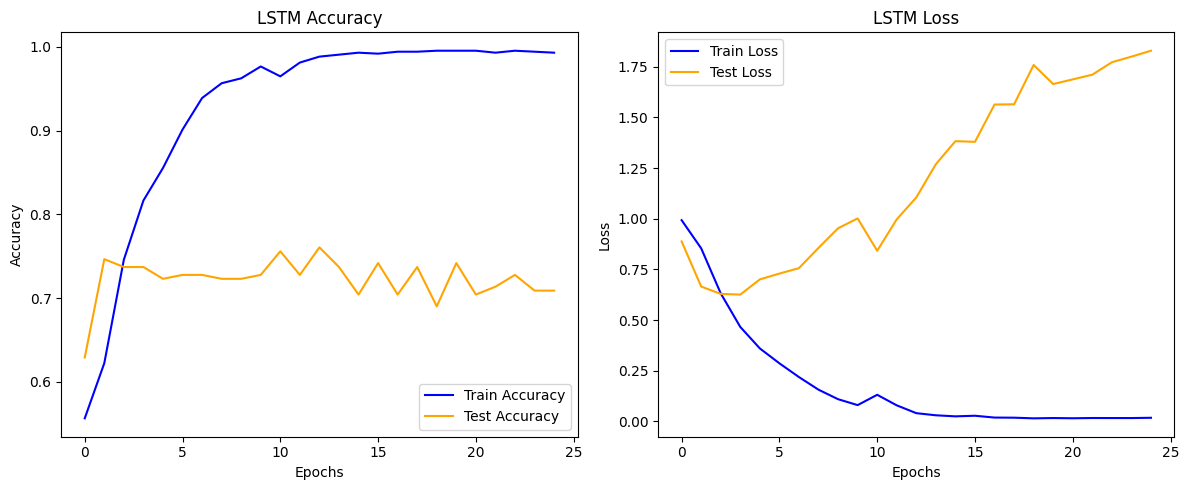

Final LSTM Test Accuracy: 0.7089201807975769


In [ ]:
# ===================================================================
# -------------------- LSTM WITH TOKENIZATION + PADDING --------------------
# ===================================================================

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

# Step 1: Train-test split (same as CNN)
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(
    padded_sequences, y, test_size=0.2, random_state=42
)

# Step 2: LSTM model
embedding_dim = 64
lstm_model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    Bidirectional(LSTM(128, return_sequences=False)),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes
])

lstm_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Step 3: Train the model
history_lstm = lstm_model.fit(
    X_train_lstm, y_train_lstm,
    epochs=25,
    batch_size=32,
    validation_data=(X_test_lstm, y_test_lstm),
    verbose=1
)

# -------------------- Accuracy Plot --------------------
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_lstm.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history_lstm.history['val_accuracy'], label='Test Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('LSTM Accuracy')
plt.legend()

# -------------------- Loss Plot --------------------
plt.subplot(1, 2, 2)
plt.plot(history_lstm.history['loss'], label='Train Loss', color='blue')
plt.plot(history_lstm.history['val_loss'], label='Test Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('LSTM Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Step 4: Final evaluation
loss_lstm, acc_lstm = lstm_model.evaluate(X_test_lstm, y_test_lstm, verbose=0)
print("Final LSTM Test Accuracy:", acc_lstm)







7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 667ms/step

LSTM Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.86      0.86       134
           1       0.59      0.43      0.50        46
           2       0.36      0.48      0.42        33

    accuracy                           0.71       213
   macro avg       0.60      0.59      0.59       213
weighted avg       0.72      0.71      0.71       213



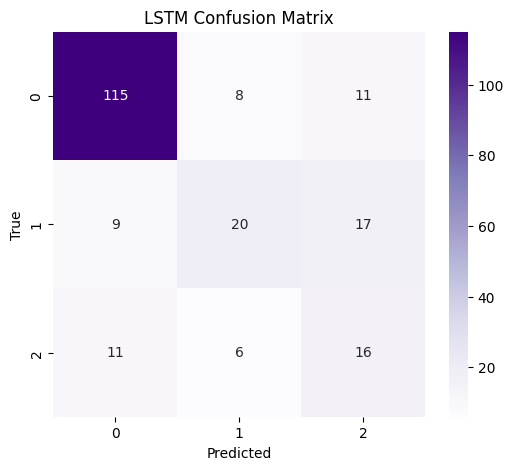

In [ ]:
# ===================================================================
# ---------------------- LSTM METRICS & VISUALS ----------------------
# ===================================================================
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import label_binarize
import seaborn as sns

# Predictions
y_pred_prob_lstm = lstm_model.predict(X_test_lstm)
y_pred_lstm = np.argmax(y_pred_prob_lstm, axis=1)


# -------------------- CLASSIFICATION REPORT --------------------
print("\nLSTM Classification Report:\n")
print(classification_report(y_test_lstm, y_pred_lstm))


# -------------------- CONFUSION MATRIX --------------------
cm_lstm = confusion_matrix(y_test_lstm, y_pred_lstm)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_lstm, annot=True, fmt='d', cmap='Purples')
plt.title("LSTM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()





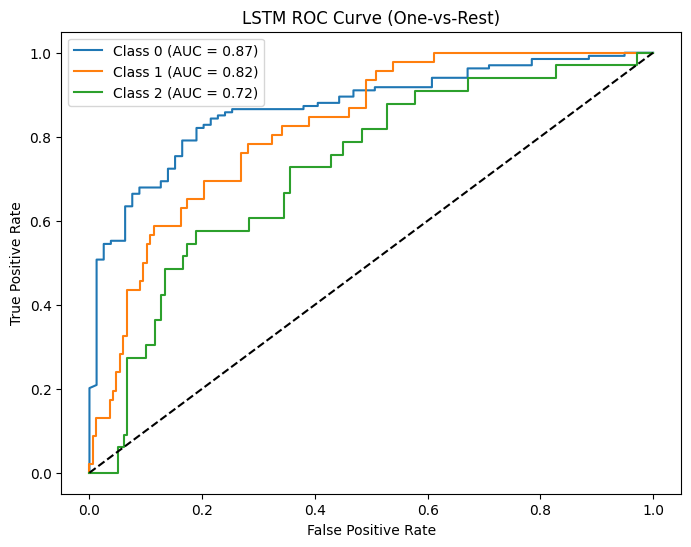

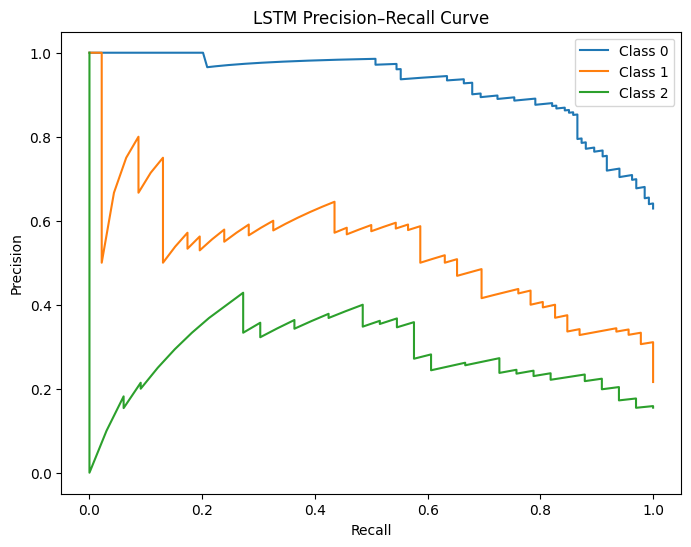

In [ ]:
# -------------------- MULTICLASS ROC (OVR) --------------------
classes = np.unique(y)
y_test_bin_lstm = label_binarize(y_test_lstm, classes=classes)

plt.figure(figsize=(8, 6))
for i in range(len(classes)):
    fpr, tpr, _ = roc_curve(y_test_bin_lstm[:, i], y_pred_prob_lstm[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {classes[i]} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.title("LSTM ROC Curve (One-vs-Rest)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


# -------------------- PRECISION-RECALL CURVE --------------------
plt.figure(figsize=(8, 6))
for i in range(len(classes)):
    precision, recall, _ = precision_recall_curve(y_test_bin_lstm[:, i], y_pred_prob_lstm[:, i])
    plt.plot(recall, precision, label=f"Class {classes[i]}")

plt.title("LSTM Precision–Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()

In [ ]:
import numpy as np
import tensorflow as tf
from transformers import DistilBertTokenizerFast, TFDistilBertForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


Epoch 1/25


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.5297 - loss: 1.0319 - val_accuracy: 0.6291 - val_loss: 0.8847
Epoch 2/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.5802 - loss: 0.8835 - val_accuracy: 0.7230 - val_loss: 0.7122
Epoch 3/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.7783 - loss: 0.6278 - val_accuracy: 0.7606 - val_loss: 0.5780
Epoch 4/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.8181 - loss: 0.4292 - val_accuracy: 0.7653 - val_loss: 0.5626
Epoch 5/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9230 - loss: 0.2604 - val_accuracy: 0.7512 - val_loss: 0.5786
Epoch 6/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9614 - loss: 0.1707 - val_accuracy: 0.7700 - val_loss: 0.6198
Epoch 7/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9738 - loss: 0.1172 - val_accuracy: 0.7559 - val_loss: 0.6645
Epoch 8/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9820 - loss: 0.0803 - val_accuracy: 0.7653 - val_loss: 0.

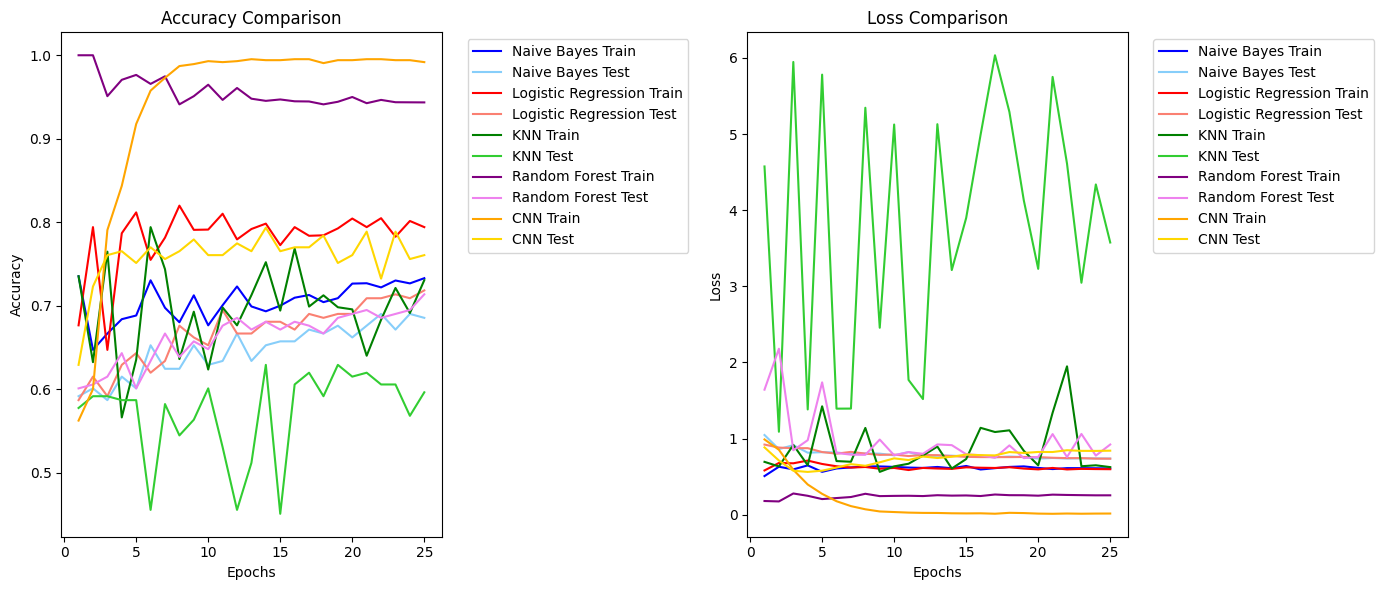


Final Test Accuracies:
Naive Bayes: 0.6854
Logistic Regression: 0.7183
KNN: 0.5962
Random Forest: 0.7136
CNN: 0.7606


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense

# ---------------------------------------------------------
# ASSUME: You already have preprocessed data ready
#   X, y  -> TF-IDF features for sklearn models
#   padded_sequences, y -> padded token sequences for CNN
#   vocab_size, max_length -> available from preprocessing
# ---------------------------------------------------------

# Split for sklearn models
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Split for CNN
X_train_seq, X_test_seq, y_train_seq, y_test_seq = train_test_split(
    padded_sequences, y, test_size=0.2, random_state=42
)

epochs = 25
results = {
    "Naive Bayes": {"train_color": "blue", "test_color": "lightskyblue"},
    "Logistic Regression": {"train_color": "red", "test_color": "salmon"},
    "KNN": {"train_color": "green", "test_color": "limegreen"},
    "Random Forest": {"train_color": "purple", "test_color": "violet"},
    "CNN": {"train_color": "orange", "test_color": "gold"},
}

# -------------------- Sklearn Models --------------------
def train_sklearn_model(model_class, X_train, X_test, y_train, y_test, **kwargs):
    train_accs, test_accs, train_losses, test_losses = [], [], [], []

    for epoch in range(1, epochs + 1):
        sample_size = int(X_train.shape[0] * (epoch / epochs))
        idx = np.random.choice(X_train.shape[0], sample_size, replace=False)
        X_epoch_train = X_train[idx]
        y_epoch_train = y_train.iloc[idx] if hasattr(y_train, "iloc") else y_train[idx]

        model = model_class(**kwargs)
        model.fit(X_epoch_train, y_epoch_train)

        train_pred = model.predict(X_epoch_train)
        test_pred = model.predict(X_test)

        if hasattr(model, "predict_proba"):
            train_proba = model.predict_proba(X_epoch_train)
            test_proba = model.predict_proba(X_test)
        else:
            train_proba = np.eye(len(model.classes_))[train_pred]
            test_proba = np.eye(len(model.classes_))[test_pred]

        train_accs.append(accuracy_score(y_epoch_train, train_pred))
        test_accs.append(accuracy_score(y_test, test_pred))
        train_losses.append(log_loss(y_epoch_train, train_proba, labels=model.classes_))
        test_losses.append(log_loss(y_test, test_proba, labels=model.classes_))

    final_acc = test_accs[-1]
    return train_accs, test_accs, train_losses, test_losses, final_acc


# Naive Bayes
nb_train_acc, nb_test_acc, nb_train_loss, nb_test_loss, nb_final = train_sklearn_model(
    MultinomialNB, X_train, X_test, y_train, y_test
)
results["Naive Bayes"].update({
    "train_acc": nb_train_acc, "test_acc": nb_test_acc,
    "train_loss": nb_train_loss, "test_loss": nb_test_loss,
    "final_acc": nb_final
})

# Logistic Regression
lr_train_acc, lr_test_acc, lr_train_loss, lr_test_loss, lr_final = train_sklearn_model(
    LogisticRegression, X_train, X_test, y_train, y_test,
    max_iter=1000, solver="liblinear"
)
results["Logistic Regression"].update({
    "train_acc": lr_train_acc, "test_acc": lr_test_acc,
    "train_loss": lr_train_loss, "test_loss": lr_test_loss,
    "final_acc": lr_final
})

# KNN
knn_train_acc, knn_test_acc, knn_train_loss, knn_test_loss, knn_final = train_sklearn_model(
    KNeighborsClassifier, X_train, X_test, y_train, y_test,
    n_neighbors=5
)
results["KNN"].update({
    "train_acc": knn_train_acc, "test_acc": knn_test_acc,
    "train_loss": knn_train_loss, "test_loss": knn_test_loss,
    "final_acc": knn_final
})

# Random Forest
rf_train_acc, rf_test_acc, rf_train_loss, rf_test_loss, rf_final = train_sklearn_model(
    RandomForestClassifier, X_train, X_test, y_train, y_test,
    n_estimators=100, random_state=42
)
results["Random Forest"].update({
    "train_acc": rf_train_acc, "test_acc": rf_test_acc,
    "train_loss": rf_train_loss, "test_loss": rf_test_loss,
    "final_acc": rf_final
})

# -------------------- CNN Model --------------------
embedding_dim = 64
cnn_model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    Conv1D(128, 5, activation="relu"),
    GlobalMaxPooling1D(),
    Dense(64, activation="relu"),
    Dense(3, activation="softmax")
])
cnn_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = cnn_model.fit(
    X_train_seq, y_train_seq,
    epochs=epochs, batch_size=32,
    validation_data=(X_test_seq, y_test_seq),
    verbose=1
)

results["CNN"].update({
    "train_acc": history.history["accuracy"],
    "test_acc": history.history["val_accuracy"],
    "train_loss": history.history["loss"],
    "test_loss": history.history["val_loss"],
    "final_acc": history.history["val_accuracy"][-1]
})

# -------------------- Plotting --------------------
plt.figure(figsize=(14, 6))

# Accuracy subplot
plt.subplot(1, 2, 1)
for algo, data in results.items():
    plt.plot(range(1, epochs + 1), data["train_acc"], color=data["train_color"], label=f"{algo} Train")
    plt.plot(range(1, epochs + 1), data["test_acc"], color=data["test_color"], label=f"{algo} Test")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

# Loss subplot
plt.subplot(1, 2, 2)
for algo, data in results.items():
    plt.plot(range(1, epochs + 1), data["train_loss"], color=data["train_color"], label=f"{algo} Train")
    plt.plot(range(1, epochs + 1), data["test_loss"], color=data["test_color"], label=f"{algo} Test")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Comparison")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()

# Print final accuracies
print("\nFinal Test Accuracies:")
for algo, data in results.items():
    print(f"{algo}: {data['final_acc']:.4f}")
